# A Deep Learning Approach to predicting the price of Bitcoin 


To explain, let me walk you through an example of building a multidimensional Long Short Term Memory (LSTM) neural network to predict the price of Bitcoin that yields the prediction results.

LSTMs are a special kind of Recurrent Neural Networks (RNN), that are particularly suitable for time series problems like dicussed above. Hence, they have become popular when trying to forecast cryptocurrency prices, as well as stock markets.

First, we must import our Python Machine learning libraries in which we will use in our model.I will mention breifly what these dependencies are capable of also. 


- NUMPY

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

 * a powerful N-dimensional array object
 * sophisticated (broadcasting) functions
 * useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

Ref: http://www.numpy.org/

- PANDAS 

In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license. 

The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

Ref : https://pandas.pydata.org/

- Matplotlib 

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. This library is essentially used to plot our data on a graph for a visual representation.

Ref: https://matplotlib.org/


- KERAS

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. Keras is an API designed to be easy to read and perfect for newcomers with regard to Machine Learning. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
It allows for seamless executiong on both CPU and GPUs and also supports recurrent networks. 

Ref: https://keras.io/


- TensorFlow 

The fundementals were previously discussed therefore we will not go into detail here.

Ref: https://www.tensorflow.org/






In [1]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


Importing the dataset. The data set is from 2014-12-01_to_2018-06-27 and contains the price of Bitcoin at every minute in the past. This dataset was retrieved from Coinbase, a well know CryptoCurrency exchange and made available to the public via Kaggle.

We store the dataset or the CSV file in the same directory as our Notebook. This allows out notebook to make use of the CSV containing our data.

Once reveiwng the data set, I group the dataset by date and take the average price of all minutes in the day as the price of the day.

In [2]:
# Import the dataset and encode the date
dataset = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')
dataset['date'] = pd.to_datetime(dataset['Timestamp'],unit='s').dt.date
group = dataset.groupby('date')
Real_Price = group['Weighted_Price'].mean()

Split the dataset

I want to predict the BTC price for a month, so I take the data of last 30 days as the test set.



In [3]:
# split data

prediction_days = 30

dataset_train= Real_Price[:len(Real_Price)-prediction_days]
dataset_test= Real_Price[len(Real_Price)-prediction_days:]

Process the data 


I feature scale the data and reshape it since I want to use Keras

In [4]:
# Data preprocess
training_set = dataset_train.values
training_set = np.reshape(training_set, (len(training_set), 1))


sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

Building the model

I build the RNN model using Keras. Then execute our training set with 150 Epochs

In [5]:

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 4, epochs = 100)


Epoch 1/100
1240/1240 [==============================] - 1s 697us/step - loss: 0.0403
Epoch 2/100
1240/1240 [==============================] - 0s 309us/step - loss: 0.0367
Epoch 3/100
1240/1240 [==============================] - 0s 304us/step - loss: 0.0333
Epoch 4/100
1240/1240 [==============================] - 0s 316us/step - loss: 0.0298
Epoch 5/100
1240/1240 [==============================] - 0s 313us/step - loss: 0.0259
Epoch 6/100
1240/1240 [==============================] - 0s 317us/step - loss: 0.0216
Epoch 7/100
1240/1240 [==============================] - 0s 319us/step - loss: 0.0169
Epoch 8/100
1240/1240 [==============================] - 0s 324us/step - loss: 0.0122
Epoch 9/100
1240/1240 [==============================] - 0s 315us/step - loss: 0.0079
Epoch 10/100
1240/1240 [==============================] - 0s 315us/step - loss: 0.0045
Epoch 11/100
1240/1240 [==============================] - 0s 314us/step - loss: 0.0022
Epoch 12/100
1240/1240 [============================

1240/1240 [==============================] - 0s 312us/step - loss: 1.5919e-04
Epoch 92/100
1240/1240 [==============================] - 0s 306us/step - loss: 1.5941e-04
Epoch 93/100
1240/1240 [==============================] - 0s 310us/step - loss: 1.5890e-04
Epoch 94/100
1240/1240 [==============================] - 0s 303us/step - loss: 1.6090e-04 0s - loss: 1.7
Epoch 95/100
1240/1240 [==============================] - 0s 307us/step - loss: 1.6303e-04
Epoch 96/100
1240/1240 [==============================] - 0s 305us/step - loss: 1.5851e-04
Epoch 97/100
1240/1240 [==============================] - 0s 304us/step - loss: 1.5887e-04
Epoch 98/100
1240/1240 [==============================] - 0s 302us/step - loss: 1.5256e-04
Epoch 99/100
1240/1240 [==============================] - 0s 300us/step - loss: 1.5883e-04
Epoch 100/100
1240/1240 [==============================] - 0s 298us/step - loss: 1.6095e-04


Prediction

Notice that I only predict the price of the next day using the price today.For an optimal effective model we would need to introduce more errors to allow for a longer period prediction. 

In [6]:
# Making the predictions
test_set = dataset_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


Visualising

Plot the predicted price and the real price!  

Compare the diference. The further we go with our trainging set the larger the difference in prediction.This is why for this study we are jsut predicting the month. However to make a longer and more effective prediction we will need to introduce more variables into our model. 


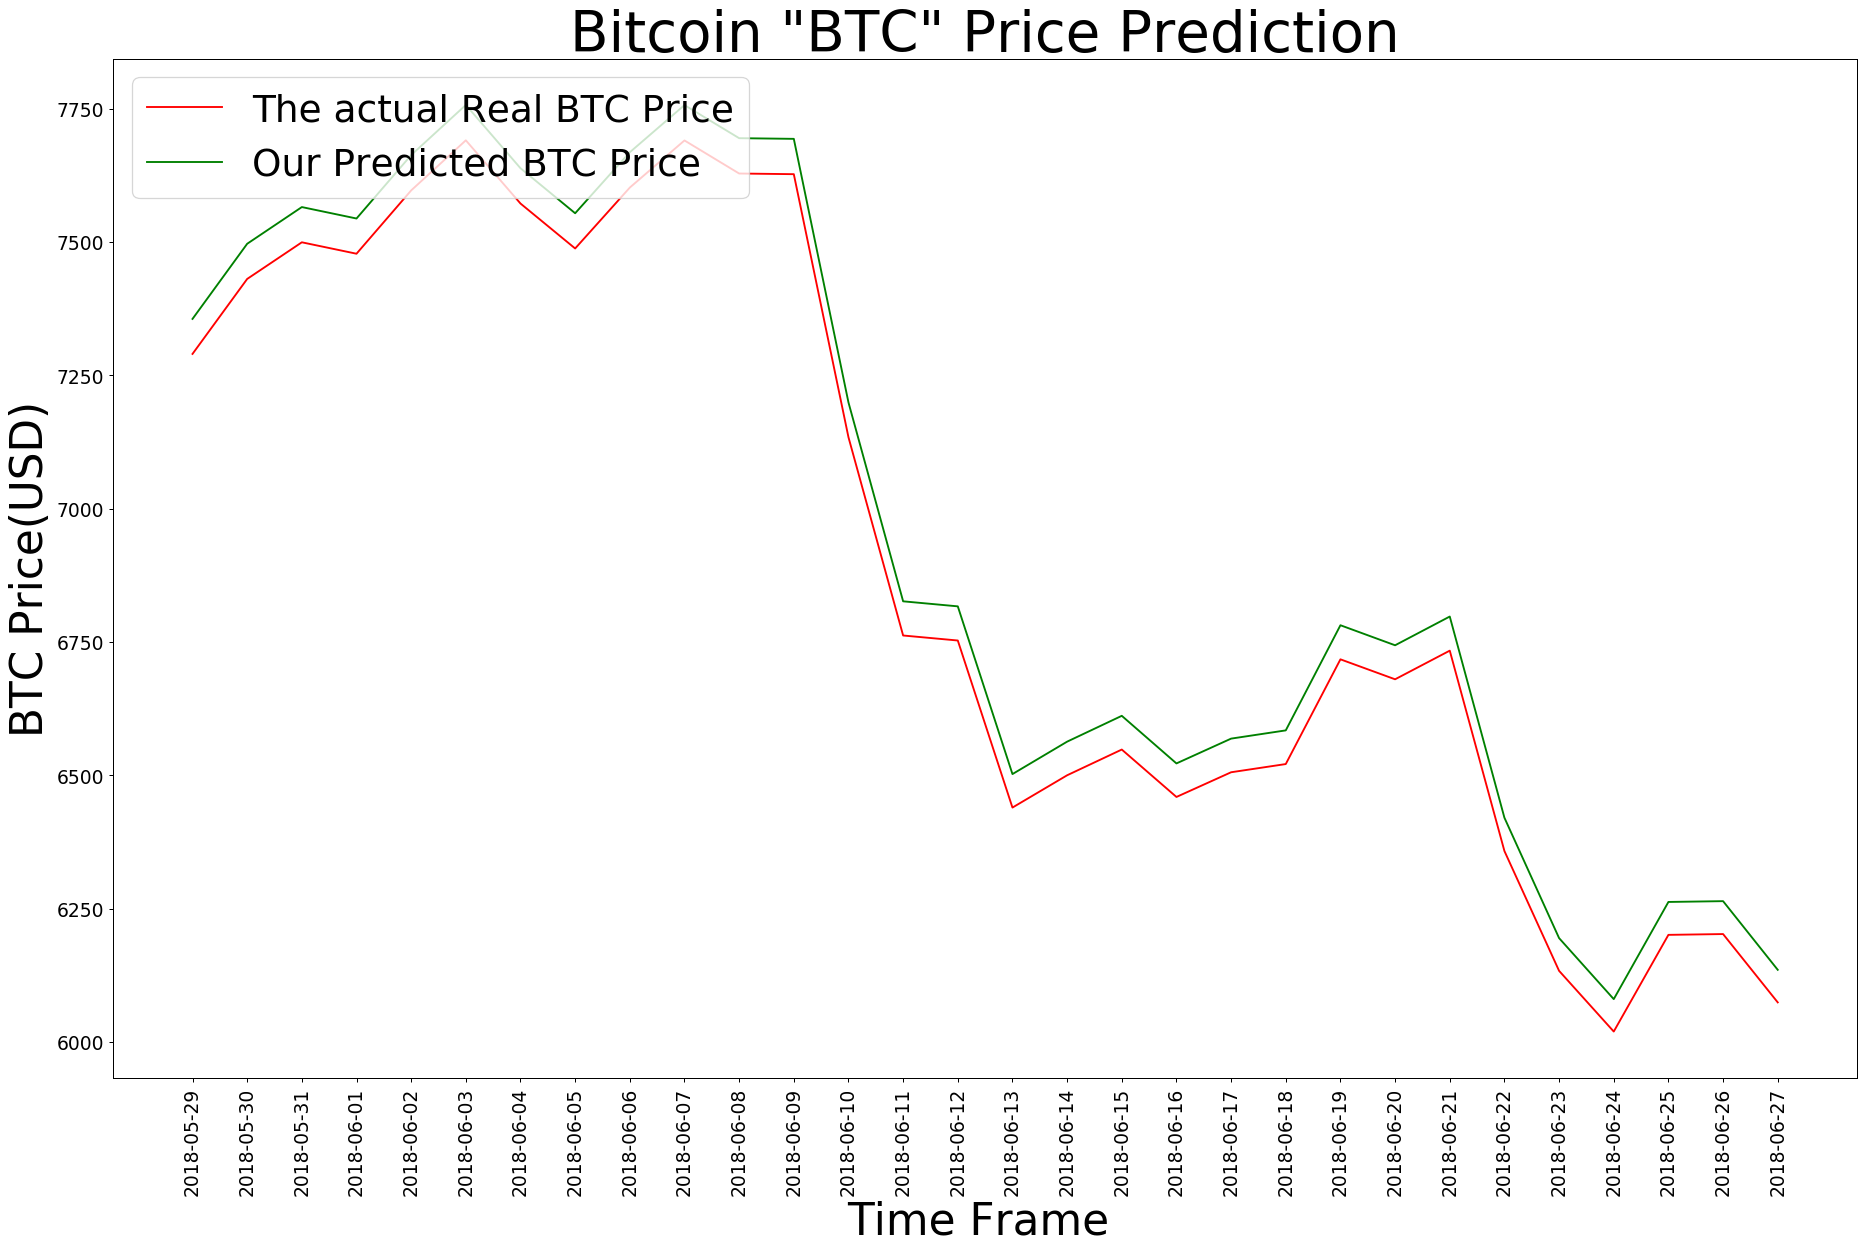

In [8]:
# Plotting the results 
plt.figure(figsize=(25,15), dpi=90, facecolor='w', edgecolor='k')
ax = plt.gca() 


plt.plot(test_set, color = 'red', label = 'The actual Real BTC Price') #red for actual price
plt.plot(predicted_BTC_price, color = 'green', label = 'Our Predicted BTC Price') #grean for predicted
plt.title('Bitcoin "BTC" Price Prediction', fontsize=45) #title of graph

dataset_test = dataset_test.reset_index()
x=dataset_test.index

labels = dataset_test['date']
plt.xticks(x, labels, rotation = 'vertical')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    
plt.xlabel('Time Frame ', fontsize=35)

plt.ylabel('BTC Price(USD)', fontsize=35)

plt.legend(loc=2, prop={'size': 30})
plt.show()

Our prediction is most accurate at 100 epochs as represented by the above graph, with a batch size of 4. Yes the network is effectively able to learn. But it ends up using a strategy in which predicting a value close to the previous one turns out to be successful in terms of minimising the mean absolute error.However no matter how accurate predictions - in practice this would not be advised for trading. 

Needless to say that more sophisticated approaches of implementing useful LSTMs for price predictions potentially do exist. Using more data, as well as optimising network architecture and hyperparameters are a start.

In my opinion, however, there is more potential in incorporating data and features that go beyond historic prices alone. After all, the finance world has already known for long that “past performance is not an indicator for future outcomes”. The same goes for those who also buy and hold cryptocurrencies.